In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as layers
from sklearn.model_selection import train_test_split
import cv2


In [3]:
data = pd.read_csv('train_LbELtWX\\train.csv')

In [10]:
X=[]
for i in data['id']:
    path = 'train_LbELtWX\\train\\' + str(i) + '.png'
    img = cv2.imread(path)
    img = cv2.resize(img,(28,28))
    X.append(img.astype('float32'))
    
X=np.array(X)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


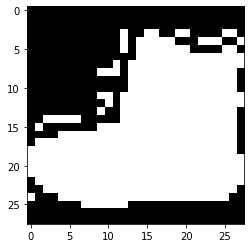

In [17]:
plt.imshow(X[0])

In [18]:
X=X / 255

In [19]:
Y=data['label']

In [45]:
Y = np.array(tf.one_hot(Y,10))

In [47]:
X_train,X_val,Y_train,Y_val = train_test_split(X,Y,random_state=42,test_size=0.17)

In [48]:
X_train.shape,Y_train.shape

((49800, 28, 28, 3), (49800, 10))

In [107]:
model= tf.keras.Sequential([
# Model_1 Architecture
#     layers.Conv2D(256,3,input_shape=(28,28,3),activation='relu'),
#     layers.MaxPooling2D(2),
#     layers.Conv2D(128,3,activation='relu'),
#     layers.MaxPooling2D(2),
    
#     layers.Flatten(),
#     layers.Dense(512,activation='relu'),
#     layers.Dropout(0.2),
#     layers.Dense(216,activation='relu'),
#     layers.Dropout(0.2),
#     layers.Dense(10,activation='softmax'),
    
# Model_2 Architecture
#     layers.Conv2D(128,3,input_shape=(28,28,3),activation='relu'),
#     layers.MaxPooling2D(2),
#     layers.Conv2D(256,3,input_shape=(28,28,3),activation='relu'),
#     layers.MaxPooling2D(3),
    
#     layers.Flatten(),
#     layers.Dense(1024,activation='relu'),
#     layers.Dropout(0.3),
#     layers.Dense(512,activation='relu'),
#     layers.Dropout(0.3),
#     layers.Dense(128,activation='relu'),
#     layers.Dropout(0.2),
#     layers.Dense(10,activation='softmax'),

# # Model_3 Architecture
    layers.Conv2D(128,3,input_shape=(28,28,3),activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(256,3 ,activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(512,3,activation='relu'),
    layers.MaxPooling2D(3),
    
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10,activation='softmax'),
    
    
])

In [108]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 26, 26, 128)       3584      
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 11, 11, 256)       295168    
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 5, 5, 256)         0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 3, 3, 512)         1180160   
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 1, 1, 512)         0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 512)             

In [109]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
 260/1557 [====>.........................] - ETA: 11:57 - loss: 1.0981 - accuracy: 0.6275

In [ ]:
model.evaluate(X_val,Y_val)

In [ ]:
model.save('model_3_learning_rate.model',save_format='h5')